In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
file = "../../data/training_data/traces_plan_po_r10.json"
df = pd.read_json(file)

raw_file = "../../data/plain_traces/plain_traces.txt"
with open(raw_file, "r") as f:
    lines = f.readlines()
    lines = [ line.split("&&") for line in lines if line.strip()]
    raw_df = pd.DataFrame(lines, columns=["domain", "ptype", 'prob', 'difficulty', 'objs', 'len', "trace"])
    raw_df['len'] = pd.to_numeric(raw_df['len'], errors='coerce')


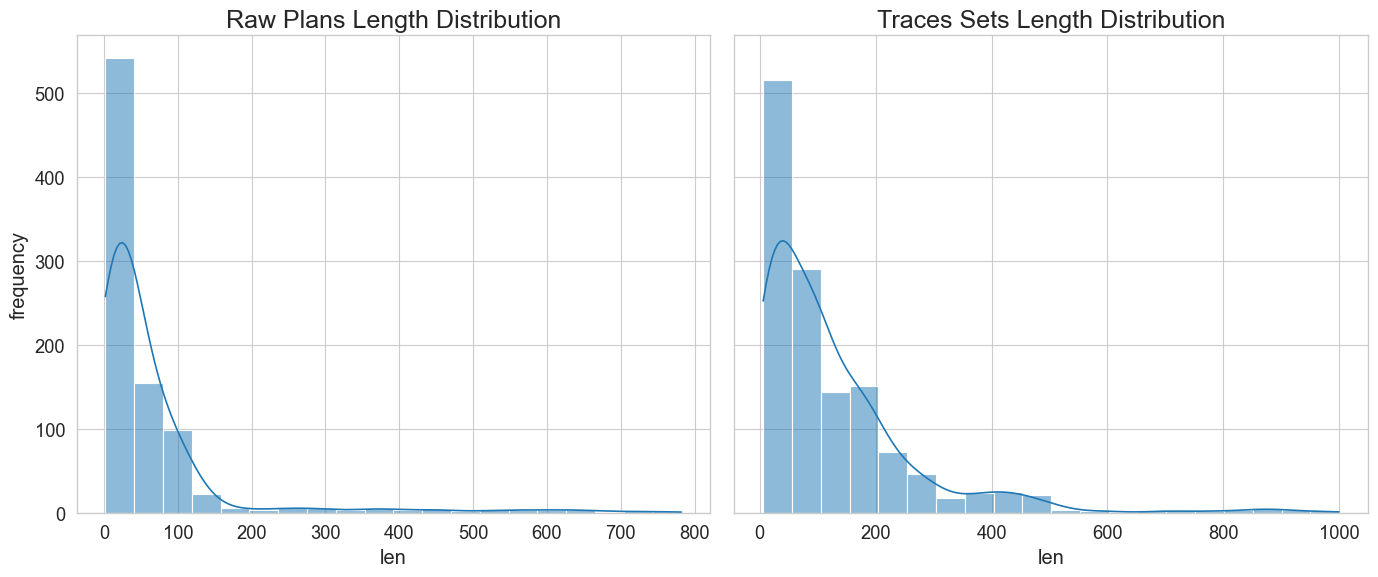

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams.update({
    "font.size": 14,        # base font size
    "axes.titlesize": 16,   # subplot titles
    "axes.labelsize": 16,   # axis labels
    "xtick.labelsize": 14,  # x-tick labels
    "ytick.labelsize": 14,  # y-tick labels
    "legend.fontsize": 14   # legend text
})



plt.rcParams.update({"font.size": 14, "axes.titlesize": 18})
sns.set_context("paper", font_scale=1.5)
# 2) optional seaborn theme
sns.set_style("whitegrid")

# Ensure 'len' column in raw_df is numeric
raw_df['len'] = pd.to_numeric(raw_df['len'], errors='coerce')
raw_df = raw_df.dropna(subset=['len'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Subplot 1: raw_df
sns.histplot(raw_df['len'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Raw Plans Length Distribution')
axes[0].set_xlabel('len')
axes[0].set_ylabel('frequency')

# Subplot 2: df
sns.histplot(df['total_length'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Traces Sets Length Distribution')
axes[1].set_xlabel('len')
axes[1].set_ylabel('frequency')

plt.tight_layout()
plt.show()
